# TP2 - Détection et reconnaissance d'images et vidéos

## 0. Import des libraires

In [1]:
import cv2 as cv
import imutils
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output

## 1. Création de nos classes

### 1.1. Classe pour le traitement des images

In [2]:
class Imaginator:
    def __init__(self, img_path: str) -> None:
        """Constructeur de la classe Imaginator

        Args:
            img_path (str): Chemin relatif de l'image
        """
        self.img = cv.imread(img_path)
    
    def convert_to_gray(self):
        """convert_to_gray: On convertit l'image en noir et blanc
        """
        self.img = cv.cvtColor(self.img, cv.COLOR_BGR2GRAY)
    
    def convert_to_rgb(self):
        """convert_to_rgb: On convertit l'image en mode RGB
        """
        self.img = cv.cvtColor(self.img, cv.COLOR_BGR2RGB)
    
    def add_gaussian_blur_filter(self, kernel_size: int):
        """add_gaussian_blur_filter: Applique un filtre de flou gaussien

        Args:
            kernel_size (int): Niveau de flou
        """
        self.img = cv.GaussianBlur(self.img, (kernel_size, kernel_size), 0)
    
    def add_canny_filter(self, min_val: int, max_val: int):
        """add_canny_filter: Applique un filtre Canny (de contour)

        Args:
            min_val (int): Valeur minimum
            max_val (int): Valeur maximum
        """
        self.img = cv.Canny(self.img, min_val, max_val)
    
    def add_sobel_filter(self):
        """add_sobel_filter: Applique un filtre Sobel (de contour)
        """
        x = cv.Sobel(self.img, cv.CV_64F, 1, 0, ksize=3)
        y = cv.Sobel(self.img, cv.CV_64F, 0, 1, ksize=3)
        self.img = cv.magnitude(x, y)

    def add_binary_threshold_filter(self, threshold: int):
        """add_binary_threshold_filter: Applique un filtre de seuillage (en mode binaire)

        Args:
            threshold (int): Niveau de seuillage
        """
        _, self.img = cv.threshold(self.img, threshold, 255, cv.THRESH_BINARY)
    
    def add_adaptative_threshold_filter(self, block_size: int, constant: int):
        """add_adaptative_threshold_filter: Applique un filtre de seuillage (en mode adaptatif)

        Args:
            block_size (int): Taille de bloc
            constant (int): Valeur de calcul du seuil adaptatif
        """
        self.img = cv.adaptiveThreshold(self.img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, block_size, constant)

    def show(self, title: str = ""):
        """show: Affichage de l'image

        Args:
            title (str, optional): Titre de l'image. La valeur par défaut est "".
        """
        plt.imshow(self.img)
        plt.title(title)
        plt.axis('off')
        plt.show()

### 1.2. Classe pour le traitement des vidéos

In [3]:
class Videorator:
    def __init__(self) -> None:
        """Constructeur de la classe Videorator
        """
        pass
    
    def __canny_filter(self, img):
        """__canny_filter: (private) Applique un filtre Canny

        Args:
            img: Objet de l'image

        Returns:
            MatLike: Retourne l'objet de l'image
        """
        image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        image = cv.GaussianBlur(image, (5, 5), 0)
        image = cv.Canny(image, 30, 150)
        image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
        return image
    
    def __threshold_binary_filter(self, img):
        """__threshold_binary_filter: (private) Applique un filtre de seuillage binaire

        Args:
            img: Objet de l'image (OpenCV)

        Returns:
            MatLike: Retourne l'objet de l'image
        """
        image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        _, image = cv.threshold(image, 127, 255, cv.THRESH_BINARY)
        image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
        return image
    
    def __show(self, frame, title: str = "") -> None:
        """__show: (private) On affiche la vidéo

        Args:
            frame: Objet de l'image
            title (str, optional): Titre de la vidéo. La valeur par défaut est "".
        """
        plt.imshow(frame)
        plt.title(title)
        plt.axis('off')
        plt.show()

    def detect_video(self, video_path: str, filter: str = "", title: str = "") -> None:
        """detect_video: Lit la vidéo en appliquant en éventuel filtre

        Args:
            video_path (str): Chemin relatif de la vidéo
            filter (str, optional): Nom du filtre. La valeur par défaut est "".
            title (str, optional): Titre de la vidéo. La valeur par défaut est "".
        """
        cap = cv.VideoCapture(video_path)
        try:
            while(True):
                ret, frame = cap.read()

                if not ret:
                    cap.release()
                    break
                
                if filter == "":
                    pass
                elif filter == 'canny':
                    frame = self.__canny_filter(frame)
                elif filter == 'thresh_binary':
                    frame = self.__threshold_binary_filter(frame)

                self.__show(frame, title=title)

                clear_output(wait=True)
        except KeyboardInterrupt:
            cap.release()
            print("Released Video Ressource")

## 2. Traitement des images et vidéos

### 2.1. Application du filtre Canny

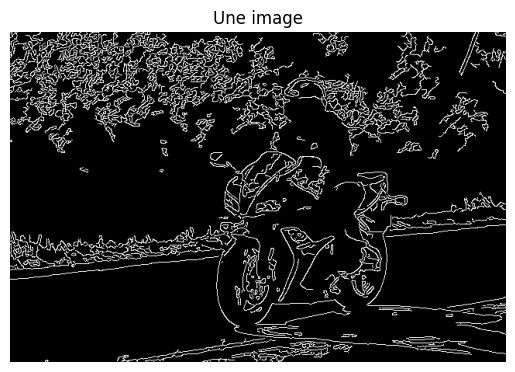

In [4]:
img_canny = Imaginator('images/motorbike.jpg')

# On convertit notre image en noir et blanc
img_canny.convert_to_gray()

# On applique un filtre de flou gaussien
img_canny.add_gaussian_blur_filter(5)

# On applique le filtre Canny
img_canny.add_canny_filter(30, 150)

# On convertit notre image aux couleurs d'origine
img_canny.convert_to_rgb()

# On affiche notre image
img_canny.show('Une image')

### 2.2. Application du filtre Sobel

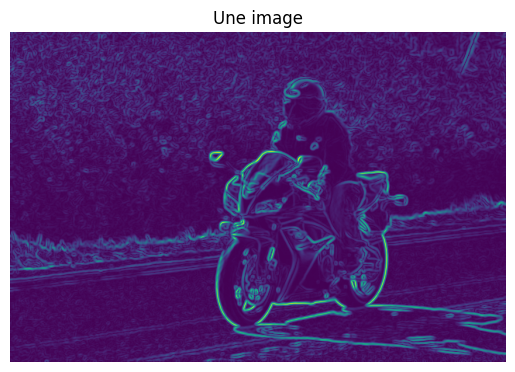

In [5]:
img_sobel = Imaginator('images/motorbike.jpg')

# On convertit notre image en noir et blanc
img_sobel.convert_to_gray()

# On applique un filtre de flou gaussien
img_sobel.add_gaussian_blur_filter(5)

# On applique le filtre Sobel
img_sobel.add_sobel_filter()

# On affiche notre image
img_sobel.show('Une image')

### 2.3. Application des filtres sur des vidéos

In [6]:
video = Videorator()

#### 2.3.1. Application du filtre Canny

In [7]:
video.detect_video('videos/airport.mp4', title='Vidéo contourée', filter='canny')

Released Video Ressource


#### 2.3.2. Application du filtre de seuillage

In [8]:
video.detect_video('videos/overpass.mp4', title='Vidéo seuillée', filter='thresh_binary')

Released Video Ressource


#### 2.3.3. Vidéo sans filtre

In [9]:
video.detect_video('videos/car_chase_01.mp4', title='Vidéo sans filtre')

Released Video Ressource


### 2.4. Application du filtre de seuillage (binary)

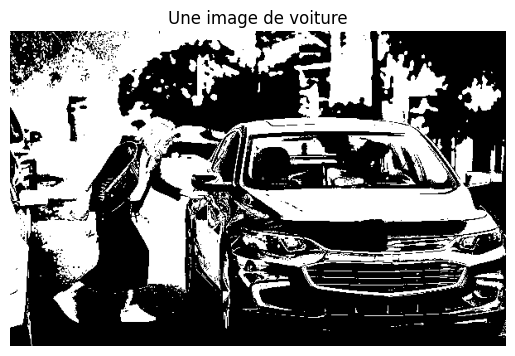

In [10]:
img_bin_threshold = Imaginator('images/car1.jpg')

# On convertit l'image en noir et blanc
img_bin_threshold.convert_to_gray()

# On applique le filtre de seuillage
img_bin_threshold.add_binary_threshold_filter(127)

# On convertit l'image en couleur d'origine
img_bin_threshold.convert_to_rgb()

# On affiche l'image
img_bin_threshold.show('Une image de voiture')

### 2.5. Application du filtre de seuillage (adaptative)

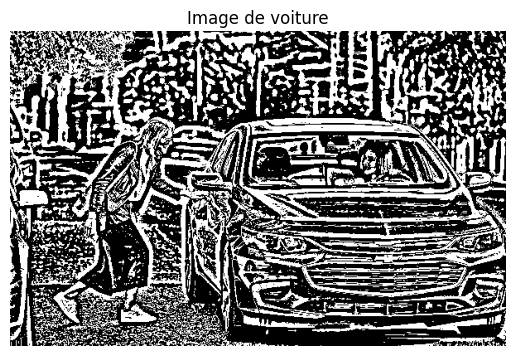

In [11]:
img_ada_threshold = Imaginator('images/car1.jpg')

# On convertit l'image en noir et blanc
img_ada_threshold.convert_to_gray()

# On applique le filtre de seuillage
img_ada_threshold.add_adaptative_threshold_filter(11, -2)

# On convertit l'image en couleur d'origine
img_ada_threshold.convert_to_rgb()

# On affiche l'image
img_ada_threshold.show('Image de voiture')